<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch  Computer Vision

## 0. Compuer vision libraries  in Pytorch

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets`  - get  datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
*  `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for se with an ML model
* `torch.utils.data.Dataset`  - Base dataset class for Pytorch.
* `torch.utils.data.dataloader` - Creates a Python iterable over a dataset

In [1]:
# import Pytorch
import torch
from torch import nn

#import torchvision
import torchvision

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualization
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


##1. getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasetd

In [2]:
#setup  training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to  download the data
    train=True, #do we want the training datasets?
    download = True,# do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(),# how  do we want to transform the data?
    target_transform=None# how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.0MB/s]


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
#see the training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### Check the input and output of the data

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width ]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width ]
Image label: Ankle boot


## 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28]) 


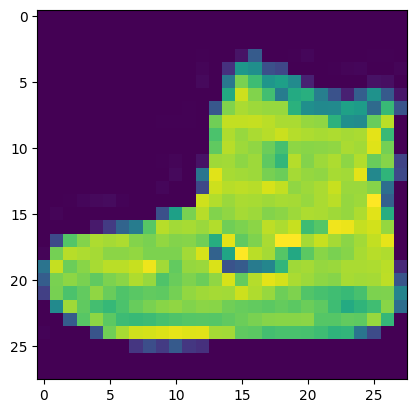

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape} ")
plt.imshow(image.squeeze())
# image

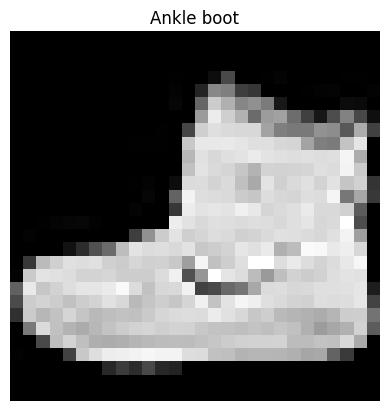

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

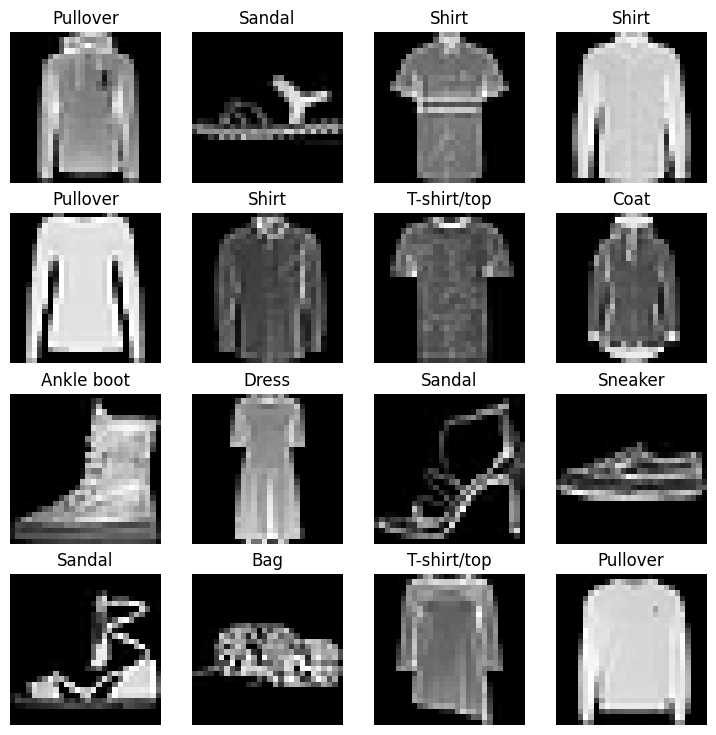

In [11]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

Do you think the items of clothing (images) could be pure linear lines? Or d you think we'll need non-lineariies?

## 2. Prepare DataLoader

Right now, our data is in the form of Pytorch dataset

DataLoader turns our dataset into aa Python iterable.

More specifically , we want  to turn our data into batches(or mini-batches



why would we do this?
1. It is computatonally efficient , as in your comuting hardware may not be able to look (store in memory) at 60000 images in one hit . SO we break it down to 32 images at a time (batch size of 32)
2. It gives or neural network more choices to update is gradients per epoch.




In [12]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datsets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [13]:
# Lets check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"length of test dataloader: {len(test_dataloader)} batches od {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f1f4a1250a0>, <torch.utils.data.dataloader.DataLoader object at 0x7f1f49578e60>)
length of train_dataloader: 1875 batches of 32...
length of test dataloader: 313 batches od 32...


In [14]:
#check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


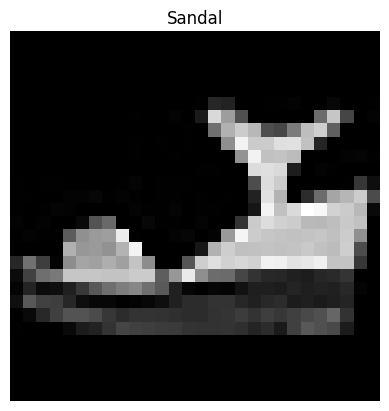

In [15]:
#SHOW  sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3 . Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, is best practice to start with a baseline model.

A baseline model is a simple model you will try and improvr upon with subsequent models/experimentrs.

In other words:start simply and add complexity when necessary.

In [16]:
##Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x= train_features_batch[0]

# flatten the sample
output = flatten_model(x) #perform forward pass

#Print out what happened
print(f"Shape before flattening : {x.shape} -> [color_channels, height , width]")
print(f"Shape after flaattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height , width]
Shape after flaattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [17]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0745, 0.1216, 0.5961, 0.6824, 0.2980, 0.2118, 0.5529, 0.7490,
         0.7647, 0.8824, 0.0941, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1255, 0.2157, 0.1804, 0.0902, 0.1569, 0.6745, 0.6275, 0.5725, 0.6980,
         0.5176, 0.4235, 0.0745, 0.1922, 0.1804, 0.0706, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0549, 0.7020, 0.0000, 0.1412, 0.1843, 0.0353, 0.0000, 0.0471, 0.1059,
         0.0902, 0.0118, 0.1725, 0.1098, 0.1098, 0.1059, 0.1765, 0.0980, 0.0000,
         0.0000, 0.0000, 0.0

In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),

        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

#setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation matrices

* Loss function - since we're working with multi-class data,our loss function will ne `nn.CrossEntropyLoss()`
* Optimizer -  our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since were working on a classification problem, let's use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

#Download helper function from learn Pytorch repo
if Path("helper_function.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb")as f:
    f.write(request.content)


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# setup loass function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Models performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [25]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start= start_time, end= end_time, device="cpu")

Train time on cpu:  0.000 seconds


4.745900002944836e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps , calculate the train loss *per batch*.
3. Print out whats happeninhg
5. Time it all (for fun)

In [26]:
# Import tqdm for progreass bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n----")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X) # Changed x to X

    #2. Calculate loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumulate train loss

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Lookrd at{batch * len(X)}/{len(train_dataloader.dataset)} sample")

  # Divde total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode(): # Changed torch.inference_model() to torch.inference_mode()
    for X_test, y_test in test_dataloader: # Changed X,y to X_test, y_test for clarity
      # 1. Forwad pas
      test_pred = model_0(X_test)

      #2. Claculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch\
    test_loss /= len(test_dataloader)

    # Caluate test test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out whats happening
  print(f"\n Training loss: { train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}") # Corrected f-string for train_loss formatting

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 =print_train_time(start= train_time_start_on_cpu, # Corrected variable name train_time_satrt_on_cpu
                                           end= train_time_end_on_cpu,
                                           device="cpu") # Simplified device to "cpu"

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Lookrd at0/60000 sample
Lookrd at12800/60000 sample
Lookrd at25600/60000 sample
Lookrd at38400/60000 sample
Lookrd at51200/60000 sample

 Training loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epochs: 1
----
Lookrd at0/60000 sample
Lookrd at12800/60000 sample
Lookrd at25600/60000 sample
Lookrd at38400/60000 sample
Lookrd at51200/60000 sample

 Training loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epochs: 2
----
Lookrd at0/60000 sample
Lookrd at12800/60000 sample
Lookrd at25600/60000 sample
Lookrd at38400/60000 sample
Lookrd at51200/60000 sample

 Training loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu:  25.453 seconds


In [27]:
next(model_0.parameters()).device

device(type='cpu')

### 4. Make predictions and get Model 0 result

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary contaning the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #Make predictions
      y_pred = model(X)

      # Accumulate the loass and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the avearage loss/acc per batch (move outside loop)
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc} # acc is already a float, no need for .item()

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader= test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [29]:
!nvidia-smi

Tue Dec  9 17:58:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [30]:
torch.cuda.is_available()

True

In [31]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02 -